In [23]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('london_weather.csv')

In [6]:
df

date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0      19790101          2.0       7.0              52.0       2.3       -4.1   
1      19790102          6.0       1.7              27.0       1.6       -2.6   
2      19790103          5.0       0.0              13.0       1.3       -2.8   
3      19790104          8.0       0.0              13.0      -0.3       -2.6   
4      19790105          6.0       2.0              29.0       5.6       -0.8   
...         ...          ...       ...               ...       ...        ...   
15336  20201227          1.0       0.9              32.0       7.5        7.5   
15337  20201228          7.0       3.7              38.0       3.6        1.1   
15338  20201229          7.0       0.0              21.0       4.1        2.6   
15339  20201230          6.0       0.4              22.0       5.6        2.7   
15340  20201231          7.0       1.3              34.0       1.5       -0.8   

       min_temp  precipitation  pressure  snow_depth  
0          -7.5            0.4  101900.0         9.0  
1          -7.5            0.0  102530.0         8.0  
2          -7.2            0.0  102050.0         4.0  
3          -6.5            0.0  100840.0         2.0  
4          -1.4            0.0  102250.0         1.0  
...         ...            ...       ...         ...  
15336       7.6            2.0   98000.0         NaN  
15337      -1.3            0.2   97370.0         NaN  
15338       1.1            0.0   98830.0         NaN  
15339      -0.1            0.0  100200.0         NaN  
15340      -3.1            0.0  100500.0         NaN  

[15341 rows x 10 columns]

In [7]:
#check nulls
df.isna().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [8]:
df= df.dropna(inplace=False)

In [9]:
df

date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0      19790101          2.0       7.0              52.0       2.3       -4.1   
1      19790102          6.0       1.7              27.0       1.6       -2.6   
2      19790103          5.0       0.0              13.0       1.3       -2.8   
3      19790104          8.0       0.0              13.0      -0.3       -2.6   
4      19790105          6.0       2.0              29.0       5.6       -0.8   
...         ...          ...       ...               ...       ...        ...   
14970  20191227          8.0       0.0              12.0       9.6        7.5   
14971  20191228          8.0       0.0              12.0       9.9        8.1   
14972  20191229          6.0       2.2              29.0      11.5        8.7   
14973  20191230          0.0       3.6              37.0       9.3        6.5   
14974  20191231          7.0       0.0              13.0       9.4        7.1   

       min_temp  precipitation  pressure  snow_depth  
0          -7.5            0.4  101900.0         9.0  
1          -7.5            0.0  102530.0         8.0  
2          -7.2            0.0  102050.0         4.0  
3          -6.5            0.0  100840.0         2.0  
4          -1.4            0.0  102250.0         1.0  
...         ...            ...       ...         ...  
14970       6.6            0.0  102880.0         0.0  
14971       6.6            0.0  103630.0         0.0  
14972       7.4            0.0  103360.0         0.0  
14973       1.5            0.0  102970.0         0.0  
14974       4.9            0.0  103160.0         0.0  

[13843 rows x 10 columns]

In [10]:
#after drop null values
df.isna().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

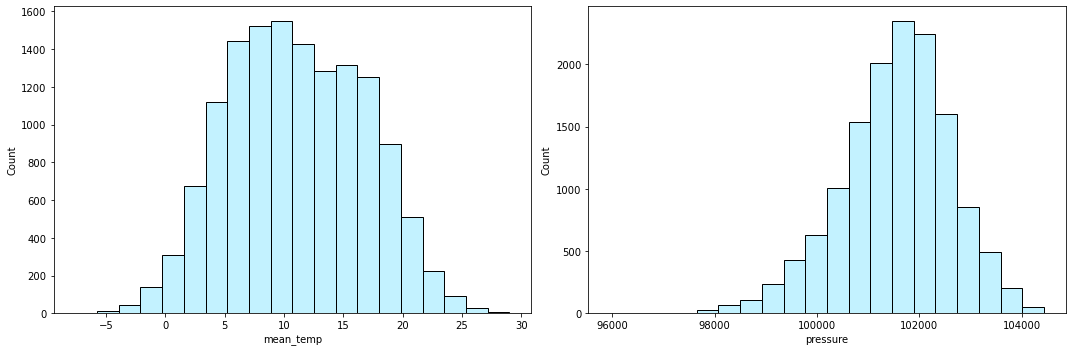

In [11]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.histplot(df['mean_temp'], color='#afeeff', ax=axes[0], bins=20)
sns.histplot(df['pressure'], color='#afeeff', ax=axes[1], bins=20);
# g = sns.FacetGrid(df, col_order=df['mean_temp'])
# g.map(sns.histplot)


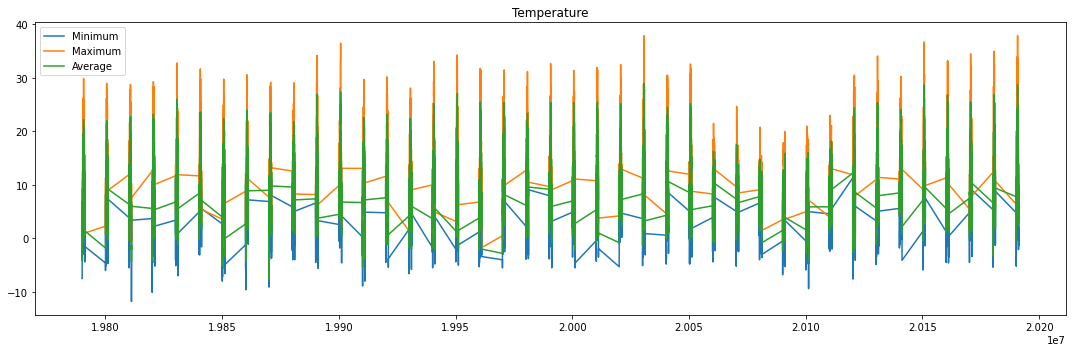

In [12]:
plt.plot(df['date'],df['min_temp'],label='Minimum')
plt.plot(df['date'],df['max_temp'],label='Maximum')
plt.plot(df['date'],df['mean_temp'],label='Average')
plt.title('Temperature')
plt.legend()
plt.show()

# describe data

In [13]:
df.describe()

date  cloud_cover      sunshine  global_radiation  \
count  1.384300e+04  13843.00000  13843.000000      13843.000000   
mean   1.998330e+07      5.32818      4.262609        114.529148   
std    1.195655e+05      2.03417      3.987488         87.758136   
min    1.979010e+07      0.00000      0.000000         12.000000   
25%    1.988071e+07      4.00000      0.400000         39.000000   
50%    1.998011e+07      6.00000      3.400000         89.000000   
75%    2.009010e+07      7.00000      7.100000        180.000000   
max    2.019123e+07      9.00000     15.700000        352.000000   

           max_temp     mean_temp      min_temp  precipitation       pressure  \
count  13843.000000  13843.000000  13843.000000   13843.000000   13843.000000   
mean      14.951911     11.085408      7.212302       1.667493  101538.493101   
std        6.510220      5.700936      5.319409       3.733947    1066.084413   
min       -6.200000     -7.600000    -11.800000       0.000000   95960.000000   
25%       10.200000      6.800000      3.200000       0.000000  100900.000000   
50%       14.400000     10.800000      7.300000       0.000000  101630.000000   
75%       19.700000     15.550000     11.400000       1.600000  102260.000000   
max       37.900000     29.000000     22.300000      61.800000  104430.000000   

         snow_depth  
count  13843.000000  
mean       0.037853  
std        0.545712  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       22.000000

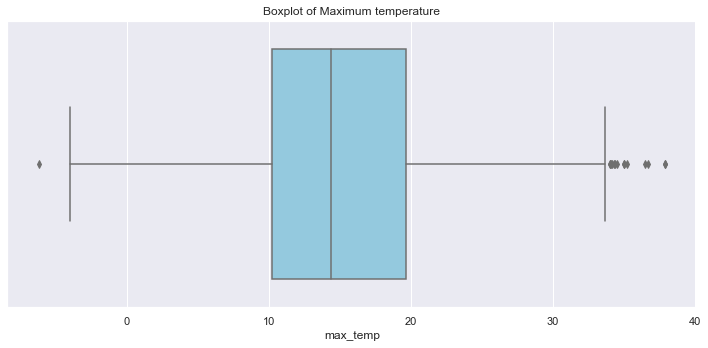

In [63]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
sns.set(style="darkgrid")
sns.boxplot(df['max_temp'],color='skyblue');
plt.title('Boxplot of Maximum temperature');

In [15]:
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
data = df.drop(['date'], axis=1).copy()

In [17]:
data.head()

cloud_cover  sunshine  global_radiation  max_temp  mean_temp  min_temp  \
0          2.0       7.0              52.0       2.3       -4.1      -7.5   
1          6.0       1.7              27.0       1.6       -2.6      -7.5   
2          5.0       0.0              13.0       1.3       -2.8      -7.2   
3          8.0       0.0              13.0      -0.3       -2.6      -6.5   
4          6.0       2.0              29.0       5.6       -0.8      -1.4   

   precipitation  pressure  snow_depth  
0            0.4  101900.0         9.0  
1            0.0  102530.0         8.0  
2            0.0  102050.0         4.0  
3            0.0  100840.0         2.0  
4            0.0  102250.0         1.0

In [24]:
data[[
    'cloud_cover',
    'sunshine',
    'global_radiation',
    'max_temp',
    'mean_temp',
    'min_temp',
    'precipitation',
    'pressure',
    'snow_depth']] = MinMaxScaler().fit_transform(data[['cloud_cover','sunshine','global_radiation','max_temp','mean_temp','min_temp','precipitation','pressure','snow_depth']])

In [25]:
data.describe()

cloud_cover      sunshine  global_radiation      max_temp  \
count  13843.000000  13843.000000      13843.000000  13843.000000   
mean       0.592020      0.271504          0.301556      0.479635   
std        0.226019      0.253980          0.258112      0.147624   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.444444      0.025478          0.079412      0.371882   
50%        0.666667      0.216561          0.226471      0.467120   
75%        0.777778      0.452229          0.494118      0.587302   
max        1.000000      1.000000          1.000000      1.000000   

          mean_temp      min_temp  precipitation      pressure    snow_depth  
count  13843.000000  13843.000000   13843.000000  13843.000000  13843.000000  
mean       0.510530      0.557546       0.026982      0.658618      0.001721  
std        0.155763      0.155994       0.060420      0.125866      0.024805  
min        0.000000      0.000000       0.000000      0.000000      0.000000  
25%        0.393443      0.439883       0.000000      0.583235      0.000000  
50%        0.502732      0.560117       0.000000      0.669421      0.000000  
75%        0.632514      0.680352       0.025890      0.743802      0.000000  
max        1.000000      1.000000       1.000000      1.000000      1.000000

# Normalization and Modelling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
sun = data["max_temp"].values.reshape(-1,1)
gr = data["global_radiation"].values
xsungr_train, xsungr_test, ysungr_train, ysungr_test = train_test_split(sun,gr,test_size=1/3,random_state=0)

# Normalisasi Data sungr
scaler = StandardScaler()
xsungr_train = scaler.fit_transform(xsungr_train)
xsungr_test = scaler.fit_transform(xsungr_test)

# Menggunakan model Linear Regression
model1 = LinearRegression()

# Latih data menggunakan model sungr
model1.fit(xsungr_train, ysungr_train)

# Prediksi model sungr
y_pred_sungr = model1.predict(xsungr_test)
x_pred_sungr = model1.predict(xsungr_train)

print('Model SUNGR')
print("Train: ", model1.score(xsungr_train,ysungr_train))
print("Test: ", model1.score(xsungr_test,ysungr_test))

Model SUNGR
Train:  0.46783539815271225
Test:  0.4800086629675391


In [50]:
avg_temp = data["sunshine"].values.reshape(-1,1)
gr = data["mean_temp"].values

# Split Data for average temp vs global radiation
xtempgr_train, xtempgr_test, ytempgr_train, ytempgr_test = train_test_split(avg_temp,gr,test_size=1/3,random_state=0)

# Normalisasi Data tempgr
scaler = StandardScaler()
xtempgr_train = scaler.fit_transform(xtempgr_train)
xtempgr_test = scaler.fit_transform(xtempgr_test)

# Menggunakan model Linear Regression
model2 = LinearRegression()

# Latih data menggunakan model tempgr
model2.fit(xtempgr_train, ytempgr_train)

# Prediksi model tempgr
y_pred_tempgr = model2.predict(xtempgr_test)
x_pred_tempgr = model2.predict(xtempgr_train)

print('Model TEMPGR')
print("Train: ", model2.score(xtempgr_train,ytempgr_train))
print("Test: ", model2.score(xtempgr_test,ytempgr_test))

Model TEMPGR
Train:  0.1543611493619439
Test:  0.1642626770986403


# Evaluation

Text(0, 0.5, 'global_radiation')

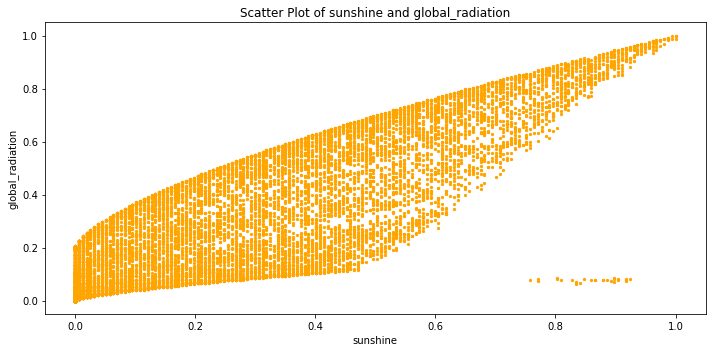

In [51]:
from pandas._libs.tslibs.period import IncompatibleFrequency
sunshine = data["sunshine"]
global_radiation = data["global_radiation"]

plt.title("Scatter Plot of sunshine and global_radiation")
plt.scatter(sunshine,global_radiation, color="orange", s=5)
plt.xlabel("sunshine")
plt.ylabel("global_radiation")

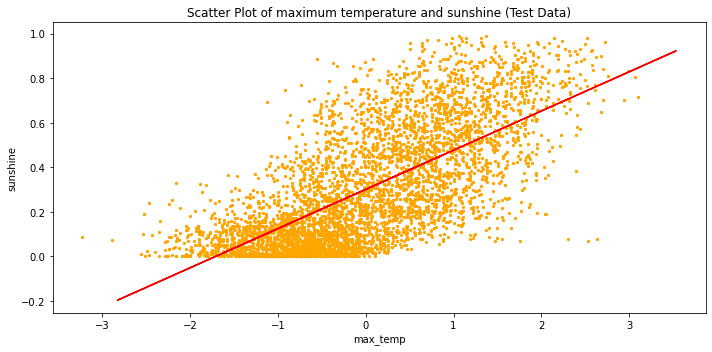

In [52]:
plt.ticklabel_format(style="plain")
plt.scatter(xsungr_test,ysungr_test,color="orange", s=5)
plt.plot(xsungr_train,x_pred_sungr,color="red")
plt.title("Scatter Plot of maximum temperature and sunshine (Test Data)")
plt.xlabel("max_temp")
plt.ylabel("sunshine")
plt.show()

In [57]:
max_temp = data["global_radiation"].values.reshape(-1,1)
sun = data["max_temp"].values

# Split Data for sun vs global radiation
xmaxsun_train, xmaxsun_test, ymaxsun_train, ymaxsun_test = train_test_split(max_temp,sun,test_size=1/3,random_state=0)

# Normalisasi Data suncloud
scaler = StandardScaler()
xmaxsun_train = scaler.fit_transform(xmaxsun_train)
xmaxsun_test = scaler.fit_transform(xmaxsun_test)

# Menggunakan model Linear Regression
model5 = LinearRegression()

# Latih data menggunakan model suncloud
model5.fit(xmaxsun_train, ymaxsun_train)

# Prediksi model suncloud
y_pred_maxsun = model5.predict(xmaxsun_test)
x_pred_maxsun = model5.predict(xmaxsun_train)

print('Model MAXSUN')
print("Train: ", model5.score(xmaxsun_train,ymaxsun_train))
print("Test: ", model5.score(xmaxsun_test,ymaxsun_test))

Model MAXSUN
Train:  0.46783539815271213
Test:  0.48010319854182126


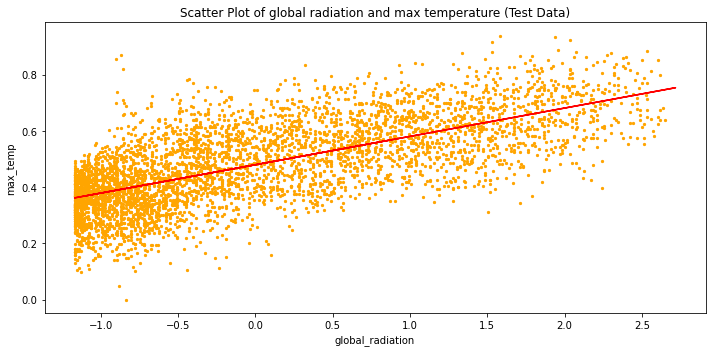

In [58]:
plt.ticklabel_format(style="plain")
plt.scatter(xmaxsun_test,ymaxsun_test,color="orange", s=5)
plt.plot(xmaxsun_train,x_pred_maxsun,color="red")
plt.title("Scatter Plot of global radiation and max temperature (Test Data)")
plt.xlabel("global_radiation")
plt.ylabel("max_temp")
plt.show()

In [39]:
sun = data["sunshine"].values.reshape(-1,1)
cloud = data["cloud_cover"].values

# Split Data for sun vs global radiation
xsuncloud_train, xsuncloud_test, ysuncloud_train, ysuncloud_test = train_test_split(sun,cloud,test_size=1/4,random_state=0)

# Normalisasi Data suncloud
scaler = StandardScaler()
xsuncloud_train = scaler.fit_transform(xsuncloud_train)
xsuncloud_test = scaler.fit_transform(xsuncloud_test)

# Menggunakan model Linear Regression
model3 = LinearRegression()

# Latih data menggunakan model suncloud
model3.fit(xsuncloud_train, ysuncloud_train)

# Prediksi model suncloud
y_pred_suncloud = model3.predict(xsuncloud_test)
x_pred_suncloud = model3.predict(xsuncloud_train)

print('Model SUNCLOUD')
print("Train: ", model3.score(xsuncloud_train,ysuncloud_train))
print("Test: ", model3.score(xsuncloud_test,ysuncloud_test))

Model SUNCLOUD
Train:  0.5440840419683446
Test:  0.5258480400228451


In [ ]:
data

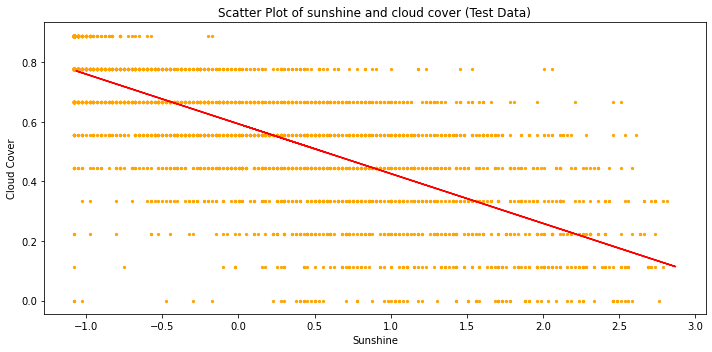

In [40]:
plt.ticklabel_format(style="plain")
plt.scatter(xsuncloud_test,ysuncloud_test,color="orange", s=5)
plt.plot(xsuncloud_train,x_pred_suncloud,color="red")
plt.title("Scatter Plot of sunshine and cloud cover (Test Data)")
plt.xlabel("Sunshine")
plt.ylabel("Cloud Cover")
plt.show()